<a href="https://colab.research.google.com/github/Anujpratap9997/DeepLearning/blob/main/ANN_for_speed_control_with_generated_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Here We have used the Motor Generated data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Final Year Project/Speed control of DC Motor/Datasets/generate_data.csv")

In [3]:
df.head()

,PWM_value,RPM_value,Terminal_voltage
0,249.085892,1304.526089,11.986831
1,248.686808,1312.770861,12.766997
2,252.268469,1312.599776,12.096688
3,248.642929,1304.960595,12.198497
4,250.712359,1307.723559,12.233487


In [4]:
X = df.drop(columns=['PWM_value', 'Terminal_voltage'])  # Exclude target columns
y = df[['PWM_value', 'Terminal_voltage']]

In [5]:
X.sample(10)

,RPM_value
3684,580.309964
2475,1008.539324
4026,395.394652
1956,1100.877762
498,1237.843669
1460,1147.331892
3880,492.692503
1524,1136.555180
115,1283.496507
1065,1194.703352


In [6]:
y.sample(10)

,PWM_value,Terminal_voltage
3089,100.201646,8.145054
3482,78.377019,6.151842
3092,98.164093,8.024010
2345,135.258279,10.116336
3194,96.043319,7.707025
1508,177.178678,10.707601
4265,39.964709,2.705141
3204,87.583719,7.084578
3341,84.327030,7.174411
1533,174.178882,10.339964


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    #Dropout(0.2),  # Dropout layer with 20% dropout rate
    Dense(64, activation='relu'),
    #Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(2)  # 2 output nodes for PWM value and Terminal voltage
])
model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7), loss='mean_squared_error', metrics=['accuracy'])  # Specify 'accuracy' metric

In [9]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
110/110 [==============================] - 5s 6ms/step - loss: 499.4252 - accuracy: 0.9818 - val_loss: 293.7996 - val_accuracy: 1.0000
Epoch 2/50
110/110 [==============================] - 1s 5ms/step - loss: 297.5694 - accuracy: 1.0000 - val_loss: 312.8327 - val_accuracy: 1.0000
Epoch 3/50
110/110 [==============================] - 0s 4ms/step - loss: 296.9305 - accuracy: 1.0000 - val_loss: 335.7955 - val_accuracy: 1.0000
Epoch 4/50
110/110 [==============================] - 0s 4ms/step - loss: 293.3507 - accuracy: 1.0000 - val_loss: 296.1165 - val_accuracy: 1.0000
Epoch 5/50
110/110 [==============================] - 0s 4ms/step - loss: 294.3948 - accuracy: 1.0000 - val_loss: 288.4444 - val_accuracy: 1.0000
Epoch 6/50
110/110 [==============================] - 0s 4ms/step - loss: 293.3314 - accuracy: 1.0000 - val_loss: 307.9215 - val_accuracy: 1.0000
Epoch 7/50
110/110 [==============================] - 0s 4ms/step - loss: 300.8887 - accuracy: 1.0000 - val_loss: 286.4548 -

In [10]:
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
#print("Test Accuracy:", accuracy)

28/28 [==============================] - 0s 3ms/step - loss: 215.8276 - accuracy: 1.0000
Test Loss: [215.82757568359375, 1.0]


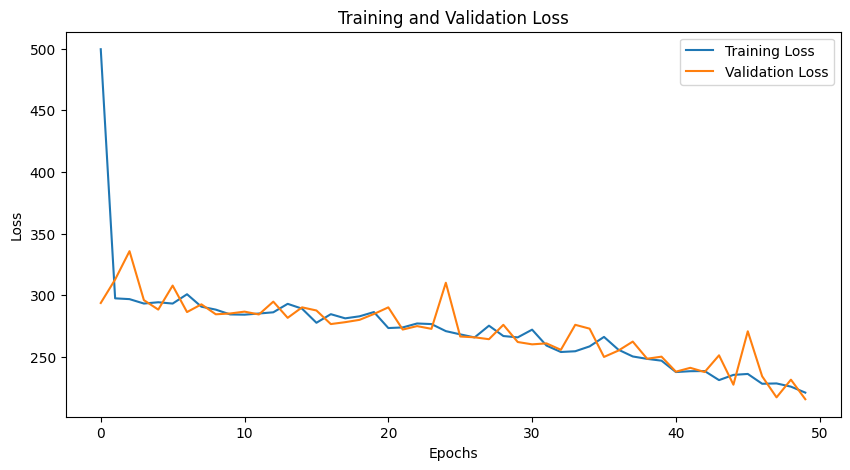

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

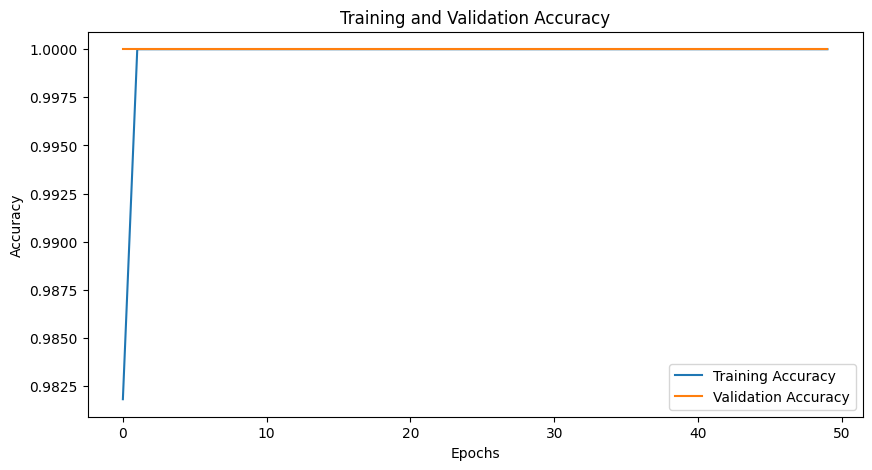

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [13]:
def predict_values(speed):
    # Create a numpy array with the speed value
    speed_array = np.array([[speed]])

    # Use the model to predict PWM and Terminal Voltage values
    predictions = model.predict(speed_array)

    # Extract PWM and Terminal Voltage predictions
    pwm_value = predictions[0][0]
    terminal_voltage = predictions[0][1]

    return pwm_value, terminal_voltage

# Example usage:
speed_input = 1000  # RPM value
predicted_pwm, predicted_voltage = predict_values(speed_input)
print(f"Predicted PWM Value: {predicted_pwm}")
print(f"Predicted Terminal Voltage: {predicted_voltage}")

1/1 [==============================] - 0s 130ms/step
Predicted PWM Value: 152.54052734375
Predicted Terminal Voltage: 9.22509765625
